<a href="https://colab.research.google.com/github/rojobravo/Statistical-Arbitrage-Bayesian-Optimized-Kappa-Half-life-Pairs-Trading-Engine/blob/main/RGBMvsHeston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
np.random.seed(42)
T = 1  # Time horizon (1 year)
dt = 1/252  # Time step (252 trading days per year)
N = int(T / dt)  # Number of steps (252)
S0 = 100  # Initial asset price
mu = 0.05  # Drift (5% expected return)
sigma = 0.05  # Volatility (20%)
c = 100  # Relativistic speed limit (large value)

# Heston model parameters
theta = 0.6  # Long-term variance
sigma_v = 0.6  # Volatility of volatility (20%)
kappa = 2  # Mean reversion rate
rho = -0.5  # Correlation between asset price and volatility
v0 = 0.2  # Initial variance

# Time array
t = np.linspace(0, T, N)

# Simulate R-GBM
def simulate_rgbm(S0, mu, sigma, c, N, dt):
    S = np.zeros(N)
    S[0] = S0
    W = np.random.normal(0, np.sqrt(dt), N)  # Wiener process increments
    for i in range(1, N):
        volatility = sigma / np.sqrt(1 + (S[i-1]/c)**2)
        S[i] = S[i-1] * (1 + mu * dt + volatility * W[i])
    return S

# Simulate Heston model
def simulate_heston(S0, mu, theta, kappa, sigma_v, v0, rho, N, dt):
    S = np.zeros(N)
    v = np.zeros(N)
    S[0] = S0
    v[0] = v0
    W1 = np.random.normal(0, np.sqrt(dt), N)  # Wiener process for S
    W2 = np.random.normal(0, np.sqrt(dt), N)  # Wiener process for v
    for i in range(1, N):
        v[i] = v[i-1] + kappa * (theta - v[i-1]) * dt + sigma_v * np.sqrt(v[i-1]) * W2[i]
        v[i] = max(v[i], 0)  # Ensure non-negative variance
        S[i] = S[i-1] * (1 + mu * dt + np.sqrt(v[i]) * np.sqrt(dt) * W1[i])
        # Ensure correlation between asset price and volatility
        W2[i] = rho * W1[i] + np.sqrt(1 - rho**2) * W2[i]
    return S




lalalalal

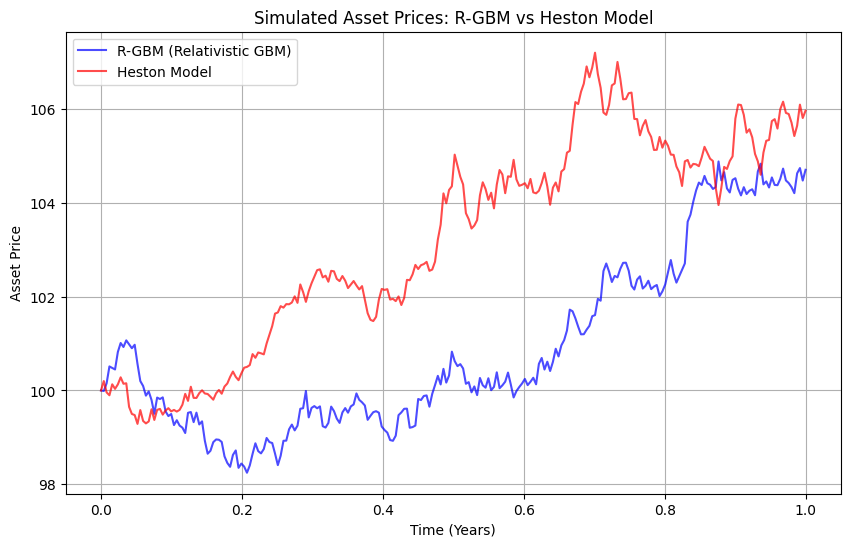

In [ ]:
# Simulate both models
S_rgbm = simulate_rgbm(S0, mu, sigma, c, N, dt)
S_heston = simulate_heston(S0, mu, theta, kappa, sigma_v, v0, rho, N, dt)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S_rgbm, label='R-GBM (Relativistic GBM)', color='blue', alpha=0.7)
plt.plot(t, S_heston, label='Heston Model', color='red', alpha=0.7)
plt.title('Simulated Asset Prices: R-GBM vs Heston Model')
plt.xlabel('Time (Years)')
plt.ylabel('Asset Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Simulate R-GBM
def simulate_rgbm(S0, mu, sigma, c, N, dt, num_simulations):
    simulations = []
    for _ in range(num_simulations):
        S = np.zeros(N)
        S[0] = S0
        W = np.random.normal(0, np.sqrt(dt), N)  # Wiener process increments
        for i in range(1, N):
            volatility = sigma / np.sqrt(1 + (S[i-1]/c)**2)
            S[i] = S[i-1] * (1 + mu * dt + volatility * W[i])
        simulations.append(S)
    return simulations

# Simulate Heston model
def simulate_heston(S0, mu, theta, kappa, sigma_v, v0, rho, N, dt, num_simulations):
    simulations = []
    for _ in range(num_simulations):
        S = np.zeros(N)
        v = np.zeros(N)
        S[0] = S0
        v[0] = v0
        W1 = np.random.normal(0, np.sqrt(dt), N)  # Wiener process for S
        W2 = np.random.normal(0, np.sqrt(dt), N)  # Wiener process for v
        for i in range(1, N):
            v[i] = v[i-1] + kappa * (theta - v[i-1]) * dt + sigma_v * np.sqrt(v[i-1]) * W2[i]
            v[i] = max(v[i], 0)  # Ensure non-negative variance
            S[i] = S[i-1] * (1 + mu * dt + np.sqrt(v[i]) * np.sqrt(dt) * W1[i])
            # Ensure correlation between asset price and volatility
            W2[i] = rho * W1[i] + np.sqrt(1 - rho**2) * W2[i]
        simulations.append(S)
    return simulations



In [ ]:
# @title Default title text
# Number of simulations
num_simulations = 10000  # You can change this to the desired number

# Simulate both models
S_rgbm = simulate_rgbm(S0, mu, sigma, c, N, dt, num_simulations)
S_heston = simulate_heston(S0, mu, theta, kappa, sigma_v, v0, rho, N, dt, num_simulations)



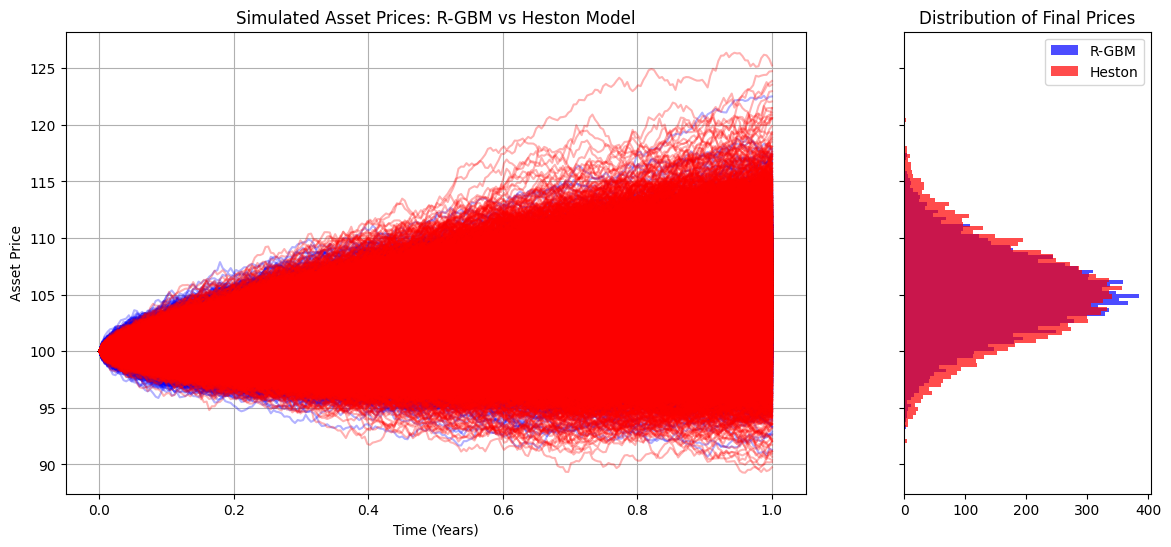

In [ ]:
# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True, gridspec_kw={'width_ratios': [3, 1]})

# Line plots of simulations
for S in S_rgbm:
    ax1.plot(t, S, color='blue', alpha=0.3)  # Plot each R-GBM simulation
for S in S_heston:
    ax1.plot(t, S, color='red', alpha=0.3)  # Plot each Heston simulation
ax1.set_title('Simulated Asset Prices: R-GBM vs Heston Model')
ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Asset Price')
ax1.grid(True)

# Histograms
ax2.hist([S[-1] for S in S_rgbm], bins=100, orientation='horizontal', color='blue', alpha=0.7, label='R-GBM')
ax2.hist([S[-1] for S in S_heston], bins=100, orientation='horizontal', color='red', alpha=0.7, label='Heston')
ax2.set_title('Distribution of Final Prices')
ax2.legend()

plt.show()

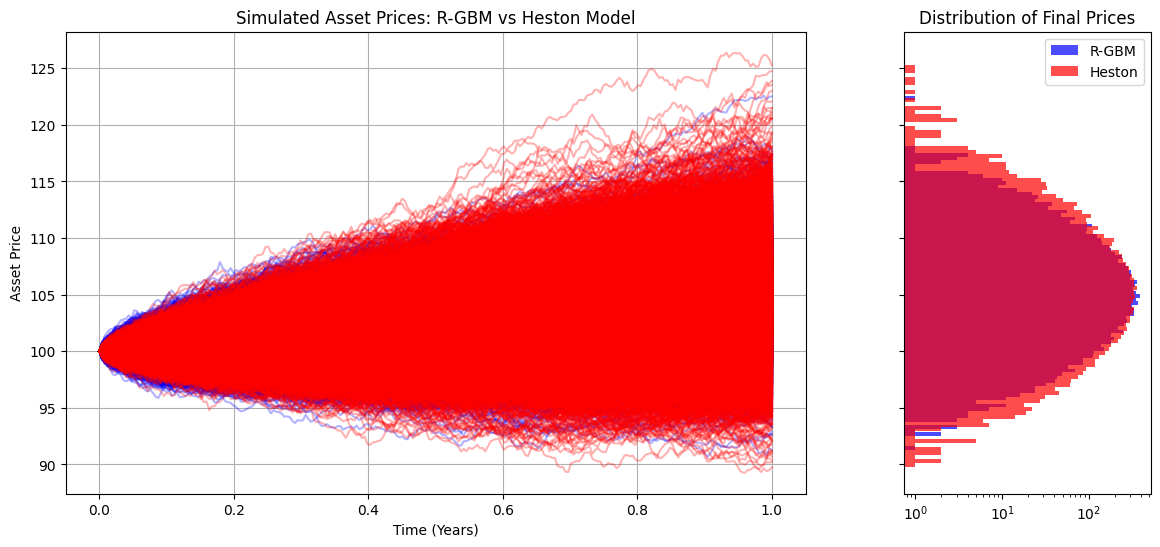

In [ ]:
# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True, gridspec_kw={'width_ratios': [3, 1]})

# Line plots of simulations
for S in S_rgbm:
    ax1.plot(t, S, color='blue', alpha=0.3)  # Plot each R-GBM simulation
for S in S_heston:
    ax1.plot(t, S, color='red', alpha=0.3)  # Plot each Heston simulation
ax1.set_title('Simulated Asset Prices: R-GBM vs Heston Model')
ax1.set_xlabel('Time (Years)')
ax1.set_ylabel('Asset Price')
ax1.grid(True)

# Histograms
ax2.hist([S[-1] for S in S_rgbm], bins=100, orientation='horizontal', color='blue', alpha=0.7, label='R-GBM', log=True)
ax2.hist([S[-1] for S in S_heston], bins=100, orientation='horizontal', color='red', alpha=0.7, label='Heston', log=True)
ax2.set_title('Distribution of Final Prices')
ax2.legend()

plt.show()